In [1]:
%load_ext autoreload
%autoreload 2

# Figure 3 - Gene Expression

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

import sys
sys.path.append('/code/')
from thalamus_merfish_analysis import abc_load as abc
from thalamus_merfish_analysis import ccf_images as cimg
from thalamus_merfish_analysis import ccf_plots as cplots

from matplotlib import rcParams
rcParams['ps.fonttype'] = 42
rcParams['pdf.fonttype'] = 42
rcParams['font.size'] = 9

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline') 

In [3]:
adata_th = abc.load_standard_thalamus(data_structure='adata')

In [4]:
# set spatial column names to `_reconstructed` coordinate space
coords = '_reconstructed'

x_col = 'x'+coords
y_col = 'y'+coords
section_col = z_col = 'z'+coords

In [6]:
# Load the CCF structures image
ccf_images = abc.get_ccf_labels_image()

# Precompute boundaries to use multiple times in this notebook w/o need to recompute
# we only need to load the boundaries for sections that contain the thalamus
sections_all = sorted(adata_th.obs[section_col].unique())
sections_int = np.rint(np.array(sections_all)/0.2).astype(int)

# precompute boundaries for thalamic sections
ccf_boundaries = cimg.sectionwise_label_erosion(ccf_images, distance_px=1, 
                                                fill_val=0, return_edges=True, 
                                                section_list=sections_int
                                                )

In [7]:
# if you reload thalamus_merfish_analysis.ccf_plots after this cell has been run, 
# cplots.CCF_REGIONS_DEFAULT will be reset to None & you'll need to re-run this cell
cplots.CCF_REGIONS_DEFAULT = abc.get_thalamus_names('substructure')

## Figure 3? - gene expression dot plot

### ATN nuclei

In [56]:
# get the cluster annotations for the nucleus of interest
nucleus = ['AD', 'AM', 'AV']
obs_annot = abc.get_obs_from_annotated_clusters(nucleus, adata_th.obs)

# clean up cluster categories
obs_annot.loc[:,'cluster'] = obs_annot.loc[:,'cluster'].cat.remove_unused_categories()
# get the nucleus-specific list of clusters
cluster_list_ATN = sorted(obs_annot.loc[:,'cluster'].cat.categories)

# use that list to filter & reset the cluster col in the full anndata object
adata_ATN = adata_th[adata_th.obs['cluster'].isin(cluster_list_ATN)].copy()

adata_ATN.obs.loc[:,'cluster'] = adata_ATN_view.obs.loc[:,'cluster'].cat.remove_unused_categories()
adata_ATN.obs.loc[:,'cluster'] = adata_ATN_view.obs.loc[:,'cluster'].cat.reorder_categories(cluster_list_ATN, ordered=True)

In [74]:
cluster_list_ATN

['2613 AD Serpinb7 Glut_1',
 '2614 AD Serpinb7 Glut_1',
 '2615 AV Col27a1 Glut_1',
 '2616 AV Col27a1 Glut_1',
 '2674 TH Prkcd Grin2c Glut_9',
 '2675 TH Prkcd Grin2c Glut_9',
 '2676 TH Prkcd Grin2c Glut_9']

In [37]:
adata_ATN.obs.loc[:,'cluster'].cat.categories

Index(['2613 AD Serpinb7 Glut_1', '2614 AD Serpinb7 Glut_1',
       '2615 AV Col27a1 Glut_1', '2616 AV Col27a1 Glut_1',
       '2674 TH Prkcd Grin2c Glut_9', '2675 TH Prkcd Grin2c Glut_9',
       '2676 TH Prkcd Grin2c Glut_9'],
      dtype='object')

In [75]:
deg_list_ATN = []
for cluster in cluster_list_ATN:
    sc.tl.rank_genes_groups(adata_ATN, groupby="cluster", groups=[cluster],
                            reference='rest', n_genes=3, method="wilcoxon")
    deg_list_ATN.extend(sc.get.rank_genes_groups_df(adata_ATN, group=cluster).names.to_list())
# sc.tl.rank_genes_groups(adata_ATN, groupby="cluster", groups=['2613 AD Serpinb7 Glut_1'],
#                         reference='rest', n_genes=5, method="wilcoxon")
# print(sc.get.rank_genes_groups_df(adata_ATN, group=None).names.to_list())
print(deg_list_ATN)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt

['Adcy2', 'Nptx2', 'Syndig1l', 'Slc17a7', 'Syndig1l', 'Scn4b', 'Htr1b', 'Zbtb16', 'Col27a1', 'Sox2', 'Chrm3', 'Car4', 'Ramp3', 'Tnnt1', 'Tmem132c', 'Calb1', 'Tox', 'Cbln1', 'Calb1', 'Tnnt1', 'Grik1']


/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


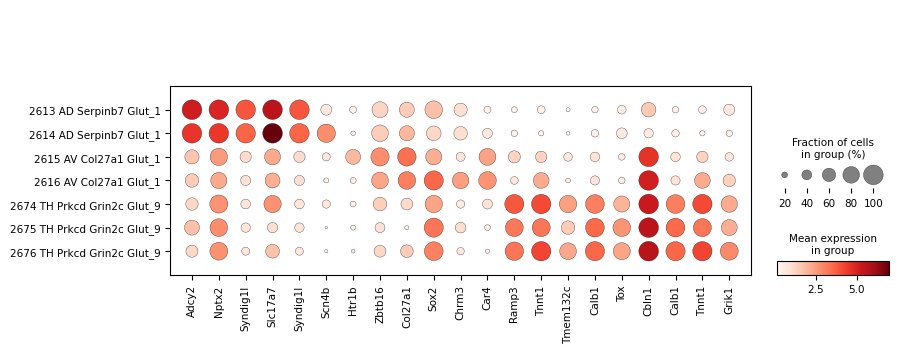

In [77]:
sc.pl.dotplot(adata_ATN,
              deg_list_ATN,
            #   sorted(list(set(deg_list_ATN))), 
              groupby='cluster', 
              dendrogram=False)

In [66]:
def get_rank_genes_list(adata, 
                        groupby='cluster', 
                        group='', 
                        reference='rest', 
                        n_genes=5):
    # find DEGs
    sc.tl.rank_genes_groups(adata, 
                            groupby="cluster", 
                            groups=[group],
                            reference=reference, 
                            n_genes=n_genes, 
                            method="wilcoxon")
    # get DEGs
    deg_list = sc.get.rank_genes_groups_df(adata, group=group).names.to_list()
    
    return deg_list

In [67]:
cluster_list_ATN[0]

'2613 AD Serpinb7 Glut_1'

In [69]:
deg_paired_list_ATN = []

# AD clusters vs each other
deg_paired_list_ATN.extend(get_rank_genes_list(adata_ATN, 
                                               group=cluster_list_ATN[0], 
                                               reference=cluster_list_ATN[1],
                                               n_genes=3))
# sc.pl.rank_genes_groups(adata_ATN, group=cluster_list_ATN[0])
deg_paired_list_ATN.extend(get_rank_genes_list(adata_ATN, 
                                               group=cluster_list_ATN[1], 
                                               reference=cluster_list_ATN[0],
                                               n_genes=3))

# AV clusters vs each other
deg_paired_list_ATN.extend(get_rank_genes_list(adata_ATN, 
                                               group=cluster_list_ATN[2], 
                                               reference=cluster_list_ATN[3],
                                               n_genes=3))
deg_paired_list_ATN.extend(get_rank_genes_list(adata_ATN, 
                                               group=cluster_list_ATN[3], 
                                               reference=cluster_list_ATN[2],
                                               n_genes=3))


/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


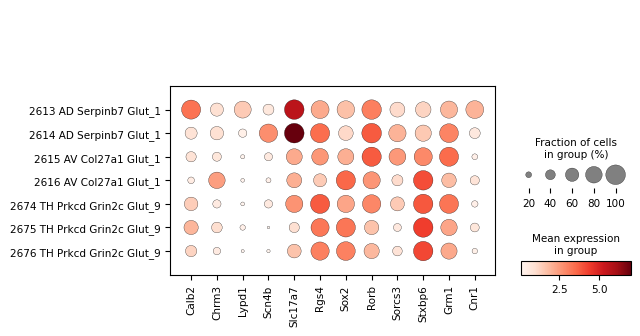

In [70]:
sc.pl.dotplot(adata_ATN,
              list(set(deg_paired_list_ATN)), 
            #   sorted(list(set(deg_paired_list_ATN))), 
              groupby='cluster', 
              dendrogram=False)

In [ ]:
markers_MD = ['Scn4b', 'Ldb2', 'Cntnap3', 'Cbln2', 'Cdh20', 'Necab1', 'Tnnt1', 
              'Calb2', 'Drd2']